<a href="https://colab.research.google.com/github/sainisatish/DeepLearningFromScratch/blob/main/Boston_Housing_priceing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.datasets import boston_housing

In [ ]:
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /=std
test_data -=mean
test_data /=std



In [ ]:
from tensorflow.keras import layers, Sequential

In [ ]:
def build_model():
    model = Sequential([layers.Dense(64,activation='relu'),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(1)
                        ])
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model



In [ ]:
"""if data points are too low then do not create validation set by dividing the 
data point in ratio instead of this use k-fold cross validation."""


'if data points are too low then do not create validation set by dividing the \ndata point in ratio instead of this use k-fold cross validation.'

In [ ]:
k =4
num_val_sample = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#Processing of fold k {i}")
    val_data = train_data[ i*num_val_sample : (i+1)*num_val_sample]
    val_targets = train_labels[i*num_val_sample : (i+1)*num_val_sample]
    partial_train_data = np.concatenate([train_data[:i*num_val_sample],train_data[(i+1)*num_val_sample:]],axis=0)
    partail_train_targets = np.concatenate([train_labels[:i*num_val_sample],train_labels[(i+1)*num_val_sample:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data,partail_train_targets,epochs=num_epochs,batch_size=16,verbose=0,validation_data=(val_data,val_targets))
    mse_history = history.history['val_mae']

    all_scores.append(mse_history)
     



#Processing of fold k 0
#Processing of fold k 1
#Processing of fold k 2
#Processing of fold k 3


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
print(all_scores)

[[19.326942443847656, 16.438203811645508, 12.573232650756836, 8.533866882324219, 5.820090293884277, 4.5876898765563965, 3.9283082485198975, 3.5111517906188965, 3.2415926456451416, 3.1030266284942627, 2.9665846824645996, 2.882256269454956, 2.822991371154785, 2.7690556049346924, 2.664031744003296, 2.7043862342834473, 2.5676960945129395, 2.533470869064331, 2.5428340435028076, 2.3607046604156494, 2.3226778507232666, 2.2731406688690186, 2.2888295650482178, 2.269988536834717, 2.352813959121704, 2.1696712970733643, 2.1977062225341797, 2.165128707885742, 2.371924638748169, 2.1225974559783936, 2.183565855026245, 2.204016923904419, 2.252002477645874, 2.054255723953247, 2.09309458732605, 1.9992755651474, 2.0887844562530518, 1.9858431816101074, 1.989498496055603, 2.0309243202209473, 2.0072195529937744, 2.048736810684204, 2.0816597938537598, 2.079948902130127, 2.1648199558258057, 2.08001708984375, 1.9600783586502075, 2.0613667964935303, 1.9747132062911987, 2.0795464515686035, 2.096198558807373, 1.9

In [ ]:
avg_mae_history=[ np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

In [ ]:
from matplotlib import pyplot as plt

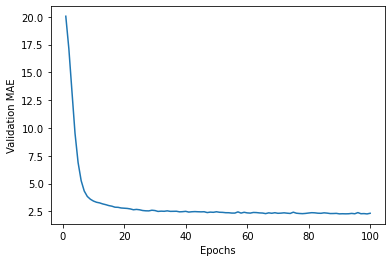

In [ ]:
plt.plot(range(1, len(avg_mae_history) + 1), avg_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

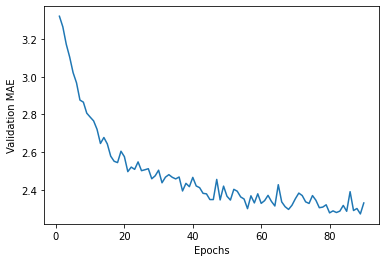

In [ ]:
truncated_mae_history = avg_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()